In [6]:
# TODO: get more xticks
# TODO: download latest data from flu site.
library(ggplot2)

# for melt method
library(reshape2)


In [7]:
# read data from csv, skip first line containing comments
clData <- read.csv("./FluViewPhase2Data/WHO_NREVSS_Public_Health_Labs.csv", skip=1)


paddedWeek <- formatC(clData$WEEK, width = 2, format = "d", flag = "0")

# combine year and week and use them as xticks when plotting
xticks <- paste(as.character(clData$YEAR), as.character(paddedWeek), sep="")



In [8]:
columns <- c("A..Subtyping.not.Performed.", "A..2009.H1N1.", "A..H3.", "H3N2v", "B", "BVic", "BYam")

customLabels <- c("A (subtyping not performed)", "A (H1N1)pdm09", "A (H3N2)", "H3N2v", "B (lineage not performed)", "B (Victoria Lineage)", "B (Yamagata Lineage)")

# get the data that we care and melt it
positiveData <- clData[, columns]
positiveData$category <- xticks
mPositiveData <- melt(positiveData, id.vars = "category")



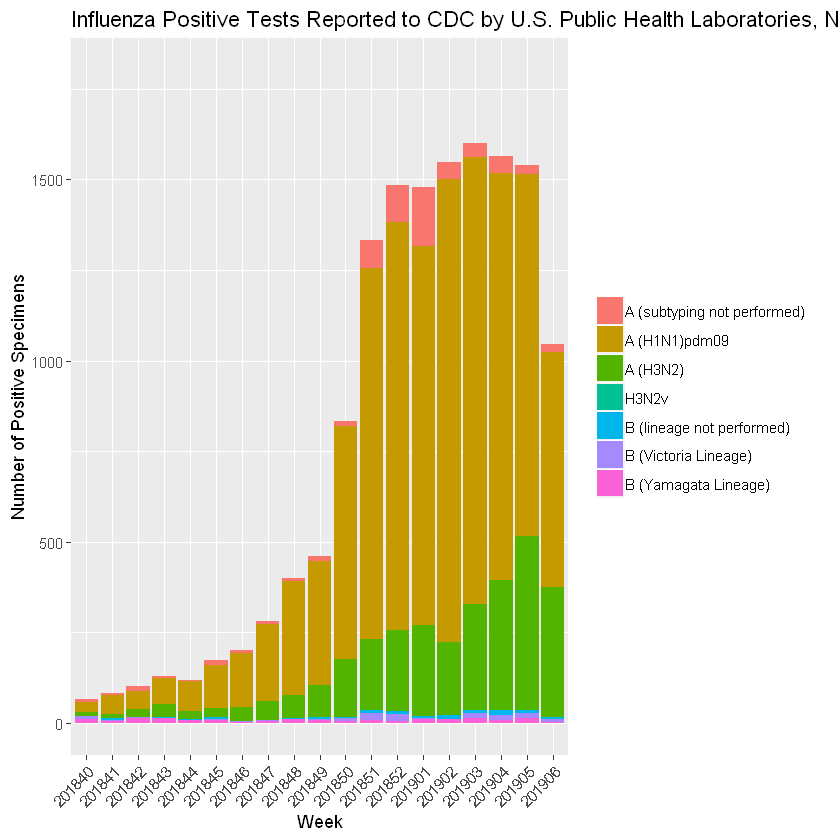

In [9]:
ggplot(
  data = mPositiveData,
  aes(
    category,
    value,
    fill = factor(variable, levels = columns, labels=customLabels),
  )) +
    geom_bar(stat = "identity") +
    ggtitle("Title") +
    ylim(0, 1800) +
  theme(legend.title=element_blank()) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  ggtitle("Influenza Positive Tests Reported to CDC by U.S. Public Health Laboratories, National Summary, 2018 - 2019 Season") +
  xlab("Week") +
  ylab("Number of Positive Specimens")